**DEEP LEARNING PROJECT**
#**Disaster tweets : real or not real ?**
by : Ghizlane DAOUDI

In [1]:
# Connect google collab to the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##PART 1: IMPORT USEFULL LIBRARIES AND DEFINE PATHS

In [2]:
# Import useful libraries

import pandas as pd
import numpy as np 
import tensorflow as tf
import pathlib
import datetime
import os
import io
import re
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall
import preprocess_kgptalkie as ps


  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-ecxvarbn
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-ecxvarbn
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11756 sha256=659df156e6ff116f00c2bc7ef5414a8951069f088aada8df8f9829b928e04736
  Stored in directory: /tmp/pip-ephem-wheel-cache-_admetaa/wheels/0d/b3/29/bfe3deffda68980088d17b81331be6667e837ffb4a071bae82
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


In [3]:
# Define paths to access to data
path_csv_train = "/content/drive/MyDrive/certif_jedha/disaster_tweets/src/train.csv"
path_csv_test = "/content/drive/MyDrive/certif_jedha/disaster_tweets/src/test.csv"
path_csv_sample_sub = "/content/drive/MyDrive/certif_jedha/disaster_tweets/src/sample_submission.csv"

##PART 2: LOAD AND EXPLORE THE DATASET

#### Download the dataset and basic statistics

In [4]:
dataset_train = pd.read_csv(path_csv_train, encoding="utf-8")
dataset_test = pd.read_csv(path_csv_test, encoding="utf-8")
dataset_sample_submission = pd.read_csv(path_csv_sample_sub, encoding="utf-8")

In [5]:
print("5 first rows of the train dataset")
print()
display(dataset_train.head())
print()
print("Basic statistics of the train dataset")
display(dataset_train.describe(include='all'))
print()
print('The train dataset contains {} tweets (rows)'.format(dataset_train.shape[0]))
print()

5 first rows of the train dataset



,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1



Basic statistics of the train dataset


,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000



The train dataset contains 7613 tweets (rows)



In [6]:
dataset_train['target'].nunique()

2

In [7]:
print("5 first rows of the test dataset")
print()
display(dataset_test.head())
print()
print("Basic statistics of the test dataset")
display(dataset_test.describe(include='all'))
print()
print('The test dataset contains {} tweets (rows)'.format(dataset_test.shape[0]))
print()

5 first rows of the test dataset



,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan



Basic statistics of the test dataset


,id,keyword,location,text
count,3263.000000,3237,2158,3263
unique,NaN,221,1602,3243
top,NaN,deluged,New York,11-Year-Old Boy Charged With Manslaughter of T...
freq,NaN,23,38,3
mean,5427.152927,NaN,NaN,NaN
std,3146.427221,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN
25%,2683.000000,NaN,NaN,NaN
50%,5500.000000,NaN,NaN,NaN
75%,8176.000000,NaN,NaN,NaN



The test dataset contains 3263 tweets (rows)



In [8]:
print("5 first rows of the sample_submission dataset")
print()
display(dataset_sample_submission.head())
print()
print("Basic statistics of the sample_submission dataset")
display(dataset_sample_submission.describe(include='all'))
print()
print('The sample_submission dataset contains {} tweets (rows)'.format(dataset_sample_submission.shape[0]))
print()

5 first rows of the sample_submission dataset



,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0



Basic statistics of the sample_submission dataset


,id,target
count,3263.000000,3263.0
mean,5427.152927,0.0
std,3146.427221,0.0
min,0.000000,0.0
25%,2683.000000,0.0
50%,5500.000000,0.0
75%,8176.000000,0.0
max,10875.000000,0.0



The sample_submission dataset contains 3263 tweets (rows)



In [9]:
dataset_sample_submission['target'].nunique()

1

As there is no target in the test dataset and the the sample submission dataset has only one unique value for the target. We will only keep the train dataset.

#### Explore the dataset

In [10]:
# Missing values
count = dataset_train.isnull().sum()
precentage = dataset_train.isnull().mean().round(4) * 100

pd.DataFrame({'count': count, 'precentage': precentage}).sort_values('count', ascending=False)

,count,precentage
location,2533,33.27
keyword,61,0.80
id,0,0.00
text,0,0.00
target,0,0.00


For now, will keep only the text and the target.

In [11]:
dataset = dataset_train[["text", "target"]]

In [12]:
dataset.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [13]:
# Class distribution
dict_disaster = {1 : 'Disaster tweets', 
                 0 : 'Non disaster tweets'
                }

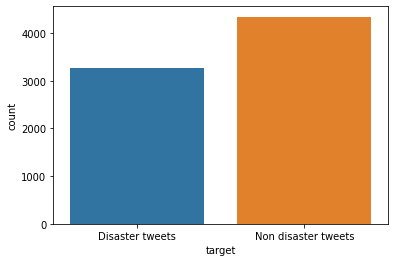

In [14]:
sns.countplot(dataset['target'].map(dict_disaster))

In [15]:
fig = px.pie(dataset['target'].map(dict_disaster), 'target')
fig.show()

## PART III : TEXT PROCESSING

In [16]:
# download all language elements related to the English language
!python -m spacy download fr_core_news_sm -q

     |████████████████████████████████| 14.7 MB 4.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


In [17]:
# Import Spacy and english initialisation
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()

# Import Stop words 
from spacy.lang.en.stop_words import STOP_WORDS

#### Explore hashtags

In [18]:
# Explore the hashtags
hashtags=[]
for i in range(dataset.shape[0]):
  hashtags.append(re.findall("#([a-zA-Z0-9_]{1,100})", dataset['text'][i]))
hashtags[0:5]

[['earthquake'], [], [], ['wildfires'], ['Alaska', 'wildfires']]

In [19]:
# Flatten hashtags list
flat_hashtags = [hashtag.lower() for sublist in hashtags for hashtag in sublist]
flat_hashtags[0:5]

['earthquake', 'wildfires', 'alaska', 'wildfires', 'rockyfire']

In [20]:
# Get hashtags frequencies
df_hashtags=pd.DataFrame(flat_hashtags,columns=['hashtags_words'])
hashtags_freq=ps.get_word_freqs(df_hashtags,'hashtags_words')
hashtags_freq[0:5]

news        76
hot         31
best        30
prebreak    30
islam       23
dtype: int64

In [21]:
hashtags_freq= pd.DataFrame(hashtags_freq).reset_index()
hashtags_freq.columns = ['hashtag', 'frequency']
hashtags_freq.head()

,hashtag,frequency
0,news,76
1,hot,31
2,best,30
3,prebreak,30
4,islam,23


In [22]:
# Create a dictionnary containing the word as a key and the frequency as a value to use .generate_from frequency for the wordcloud
df_hashtags = dict(zip(hashtags_freq['hashtag'].tolist(), hashtags_freq['frequency'].tolist()))

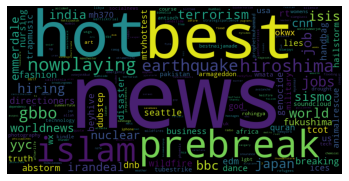

In [23]:
# Print a word cloud of hashtags
from wordcloud import WordCloud
word_cloud = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(df_hashtags)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()


#### Explore hashtags in real disater tweets

In [24]:
# Explore the hashtags in real disaster tweets
hashtags_disaster=[]
data_disaster = pd.DataFrame(dataset.loc[dataset['target']==1]).reset_index()

for i in range(data_disaster.shape[0]):
  hashtags_disaster.append(re.findall("#([a-zA-Z0-9_]{1,100})", data_disaster['text'][i]))
hashtags_disaster[0:5]

[['earthquake'], [], [], ['wildfires'], ['Alaska', 'wildfires']]

In [25]:
flat_dis_hashtags = [hashtag.lower() for sublist in hashtags_disaster for hashtag in sublist]

# Get hashtags frequencies
df_dis_hashtags=pd.DataFrame(flat_dis_hashtags,columns=['hashtags_words'])
dis_hashtags_freq=ps.get_word_freqs(df_dis_hashtags,'hashtags_words')
dis_hashtags_freq= pd.DataFrame(dis_hashtags_freq).reset_index()
dis_hashtags_freq.columns = ['hashtag', 'frequency']

# Create a dictionnary containing the word as a key and the frequency as a value to use .generate_from frequency for the wordcloud
df_dis_hashtags = dict(zip(dis_hashtags_freq['hashtag'].tolist(), dis_hashtags_freq['frequency'].tolist()))


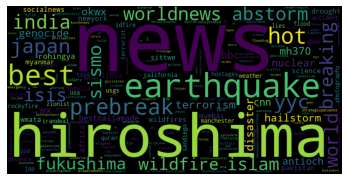

In [26]:
# Print a word cloud of hashtags contained in real disaster tweets
from wordcloud import WordCloud
word_cloud = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(df_dis_hashtags)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()


#### Explore hashtags in non disater tweets

In [27]:
# Explore the hashtags in non disaster tweets
hashtags_nondisaster=[]
data_nondisaster = pd.DataFrame(dataset.loc[dataset['target']==0]).reset_index()

# Extract hashtags
for i in range(data_nondisaster.shape[0]):
  hashtags_nondisaster.append(re.findall("#([a-zA-Z0-9_]{1,100})", data_nondisaster['text'][i]))

# Flatten hashtags list
flat_nondis_hashtags = [hashtag.lower() for sublist in hashtags_nondisaster for hashtag in sublist]

# Get hashtags frequencies
df_nondis_hashtags=pd.DataFrame(flat_nondis_hashtags,columns=['hashtags_words'])
nondis_hashtags_freq=ps.get_word_freqs(df_nondis_hashtags,'hashtags_words')
nondis_hashtags_freq= pd.DataFrame(nondis_hashtags_freq).reset_index()
nondis_hashtags_freq.columns = ['hashtag', 'frequency']

# Create a dictionnary containing the word as a key and the frequency as a value to use .generate_from frequency for the wordcloud
df_nondis_hashtags = dict(zip(nondis_hashtags_freq['hashtag'].tolist(), nondis_hashtags_freq['frequency'].tolist()))


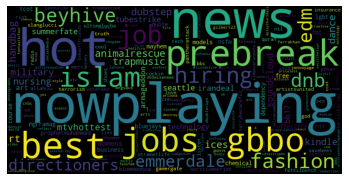

In [28]:
# Print a word cloud of hashtags contained in non disaster tweets
from wordcloud import WordCloud
word_cloud = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(df_nondis_hashtags)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

As the clouds generated from word frequencies in disaster and non disaster tweets are significantly different, we made the choice to keep the hashtags in the text we will work on.

#### Data cleaning

In [29]:
# Define a function that cleans the text

def clean_text(text):
    if type(text) == np.float:
        return ""
    text = text.replace(" +"," ").lower().strip()
    text = text.lower() # Lower capital letters
    text = re.sub("'", "", text) # to avoid removing contractions in english
    text = re.sub("@[A-Za-z0-9_]+","", text) # remove mentions
    #text = re.sub("#[A-Za-z0-9_]+","", text) # remove hashtags
    text = re.sub(r'http\S+', '', text) # remove links
    text = re.sub(r"www.\S+", "", text)# remove links
    text = re.sub(r'\n',' ', text) #  remove breaks
    text = re.sub('[()!?]', ' ', text) 
    text = re.sub('\[.*?\]',' ', text)
    text = re.sub("[^a-z0-9]"," ", text) #remove non alphanumeric characters
    text = re.sub('[0-9]+', '', text)# remove numbers
    text = text.split()
    text = " ".join(word for word in text)
    return text

In [30]:
# Cleaning the text
dataset["text_clean"] = dataset["text"].apply(lambda x: clean_text(x))
dataset["text_clean"] = dataset["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))

In [31]:
disaster_freq = ps.get_word_freqs(dataset[dataset["target"] == 1], "text_clean")
disaster_freq = pd.DataFrame(disaster_freq).reset_index()
disaster_freq.columns=['word','frequency']
df_disaster_freq = dict(zip(disaster_freq['word'].tolist(), disaster_freq['frequency'].tolist()))
display(disaster_freq)

,word,frequency
0,fire,273
1,s,193
2,kill,159
3,news,143
4,amp,135
...,...,...
6463,skeleton,1
6464,safsufa,1
6465,strait,1
6466,utility,1


In [32]:
nondisaster_freq = ps.get_word_freqs(dataset[dataset["target"] == 0], "text_clean")
nondisaster_freq = pd.DataFrame(nondisaster_freq).reset_index()
nondisaster_freq.columns=['word','frequency']
df_nondisaster_freq = dict(zip(nondisaster_freq['word'].tolist(), nondisaster_freq['frequency'].tolist()))
display(nondisaster_freq)

,word,frequency
0,like,294
1,s,243
2,amp,209
3,new,175
4,love,118
...,...,...
8465,genocide,1
8466,atl,1
8467,changefortheworse,1
8468,aus,1


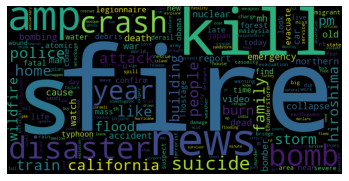

In [33]:
# Print a word cloud for real disaster tweets
from wordcloud import WordCloud
word_cloud = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(df_disaster_freq)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

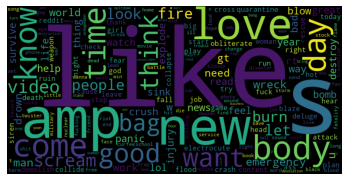

In [34]:
# Print a word cloud for non disaster tweets
from wordcloud import WordCloud
word_cloud = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(df_nondisaster_freq)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#### Text encoding

In [35]:
# instanciate the tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer() 
tokenizer.fit_on_texts(dataset["text_clean"])
dataset["text_encoded"] = tokenizer.texts_to_sequences(dataset.text_clean)

In [36]:
type(tokenizer.word_index)

dict

In [37]:
tokens = pd.DataFrame.from_dict(tokenizer.word_index,orient='index').reset_index()
tokens.columns=['word','word_index']
tokens

,word,word_index
0,s,1
1,like,2
2,fire,3
3,amp,4
4,new,5
...,...,...
11765,tnwx,11766
11766,overtake,11767
11767,bathandnortheastsomerset,11768
11768,forney,11769


In [38]:
vocab_size = tokens.shape[0]+1
vocab_size

11771

In [39]:
dataset.head()

,text,target,text_clean,text_encoded
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive,"[3479, 407, 169, 1238, 1913]"
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[119, 3, 152, 559, 5098, 5099, 961]"
2,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,"[1357, 466, 1498, 347, 5100, 292, 170, 1498, 3..."
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,"[7, 2270, 80, 170, 272, 37]"
4,Just got sent this photo from Ruby #Alaska as ...,1,send photo ruby alaska smoke wildfire pour school,"[180, 120, 5101, 1688, 171, 80, 2271, 106]"


In [40]:
max_len = max(dataset["text_encoded"].apply(lambda x: len(x)))
max_len

21

In [41]:
# Padding  the encoded text as Tensorflow is incapable to create a tensor dataset based on lists of different lengths
text_pad = tf.keras.preprocessing.sequence.pad_sequences(dataset.text_encoded,maxlen=max_len, padding="post") 
dataset['text_pad']=[text_pad[i] for i in range(len(text_pad))]
dataset.head()

,text,target,text_clean,text_encoded,text_pad
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive,"[3479, 407, 169, 1238, 1913]","[3479, 407, 169, 1238, 1913, 0, 0, 0, 0, 0, 0,..."
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[119, 3, 152, 559, 5098, 5099, 961]","[119, 3, 152, 559, 5098, 5099, 961, 0, 0, 0, 0..."
2,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,"[1357, 466, 1498, 347, 5100, 292, 170, 1498, 3...","[1357, 466, 1498, 347, 5100, 292, 170, 1498, 3..."
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,"[7, 2270, 80, 170, 272, 37]","[7, 2270, 80, 170, 272, 37, 0, 0, 0, 0, 0, 0, ..."
4,Just got sent this photo from Ruby #Alaska as ...,1,send photo ruby alaska smoke wildfire pour school,"[180, 120, 5101, 1688, 171, 80, 2271, 106]","[180, 120, 5101, 1688, 171, 80, 2271, 106, 0, ..."


## PART IV : BASELINE MODELS

In this section we will perform three models using RNN layers, then LSTM and GRU layers

### Split data into train, val and test sets

In [42]:
# Define the Dataset size and the batch size that will be used to train the model
DATASET_SIZE = dataset.shape[0]
BATCH_SIZE = 256

# Define proportions of data that will be used in the train set, the validation set and the test set
train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

In [43]:
# Shuffle the dataset using a seed to make sure that it will shuffle the same way for all of us. 
# In the initial dataset the targets are not well shuffled. As the methods ().take and .skip) we will use bellow take data in the order it is, we will first shuffle our data.
full_dataset = tf.data.Dataset.from_tensor_slices((text_pad, dataset.target))

# Define train, val and test datasets using the proportions defined above
train_data = full_dataset.take(train_size).shuffle(buffer_size=train_size,reshuffle_each_iteration=True).batch(BATCH_SIZE)
val_data = full_dataset.skip(train_size).take(val_size).shuffle(buffer_size=val_size,reshuffle_each_iteration=True).batch(BATCH_SIZE)
test_data = full_dataset.skip(train_size+val_size).batch(BATCH_SIZE)

### 1. BASELINE RNN

In [44]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM

model_baseline_RNN = tf.keras.Sequential([       
                  Embedding(vocab_size, 64, name="embedding"),
                  SimpleRNN(units=64, return_sequences=True),
                  SimpleRNN(units=32, return_sequences=False),
                  Dense(16, activation="relu"),
                  Dense(8, activation="relu"),
                  Dense(1, activation="sigmoid")
                  ])

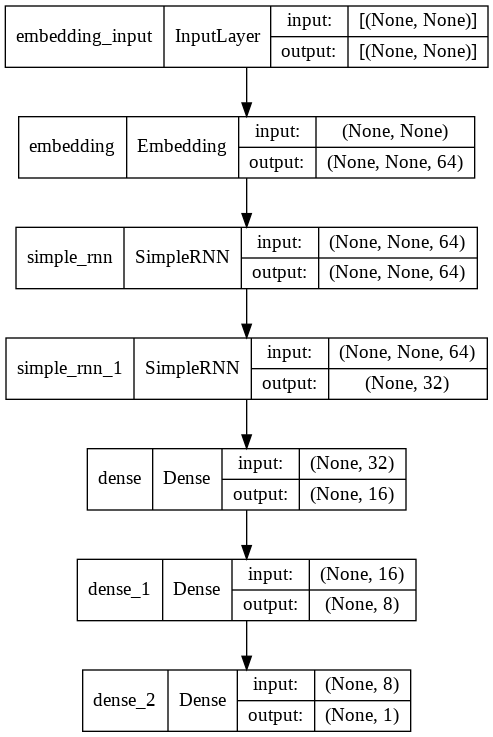

In [45]:
tf.keras.utils.plot_model(model_baseline_RNN, show_shapes=True)

In [46]:
# Import losses, metrics and optimizers that will be used
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import binary_accuracy
from tensorflow.keras.optimizers import Adam

# Compile the model
model_baseline_RNN.compile(optimizer=Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(),
              metrics=[binary_accuracy])

In [47]:
# Define an earlystop callback
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=3)

In [48]:
from gc import callbacks
model_baseline_RNN.fit(train_data,
          epochs=20, 
          validation_data=val_data,
          callbacks=[early_stop]
          )

Epoch 1/20
21/21 [==============================] - 3s 54ms/step - loss: 0.6794 - binary_accuracy: 0.5860 - val_loss: 0.6688 - val_binary_accuracy: 0.5776
Epoch 2/20
21/21 [==============================] - 1s 35ms/step - loss: 0.6543 - binary_accuracy: 0.6144 - val_loss: 0.6542 - val_binary_accuracy: 0.5925
Epoch 3/20
21/21 [==============================] - 1s 39ms/step - loss: 0.6258 - binary_accuracy: 0.6620 - val_loss: 0.6434 - val_binary_accuracy: 0.6091
Epoch 4/20
21/21 [==============================] - 1s 38ms/step - loss: 0.5811 - binary_accuracy: 0.7305 - val_loss: 0.6304 - val_binary_accuracy: 0.6258
Epoch 5/20
21/21 [==============================] - 1s 40ms/step - loss: 0.5157 - binary_accuracy: 0.7962 - val_loss: 0.6098 - val_binary_accuracy: 0.6845
Epoch 6/20
21/21 [==============================] - 1s 41ms/step - loss: 0.4412 - binary_accuracy: 0.8377 - val_loss: 0.5933 - val_binary_accuracy: 0.7020
Epoch 7/20
21/21 [==============================] - 1s 39ms/step - los

In [49]:
history_baseline_RNN = pd.DataFrame(model_baseline_RNN.history.history)
loss_baseline_RNN = history_baseline_RNN[["loss","val_loss"]]
accuracy_baseline_RNN = history_baseline_RNN[["binary_accuracy","val_binary_accuracy"]]

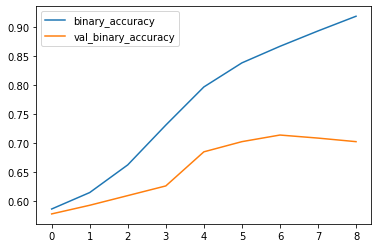

In [50]:
accuracy_baseline_RNN.plot()

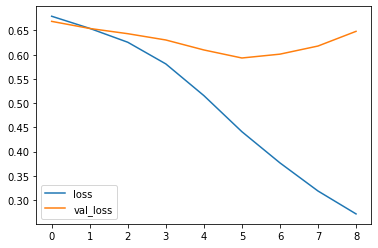

In [51]:
loss_baseline_RNN.plot()

In [52]:
eval_baseline_RNN = model_baseline_RNN.evaluate(test_data)

5/5 [==============================] - 0s 5ms/step - loss: 0.6438 - binary_accuracy: 0.6815


### 2. BASELINE LSTM

In [53]:
model_baseline_LSTM = tf.keras.Sequential([       
                  Embedding(vocab_size, 64, name="embedding"),
                  LSTM(units=64, return_sequences=True),
                  LSTM(units=32, return_sequences=False),
                  Dense(16, activation="relu"),
                  Dense(8, activation="relu"),
                  Dense(1, activation="sigmoid")
                  ])

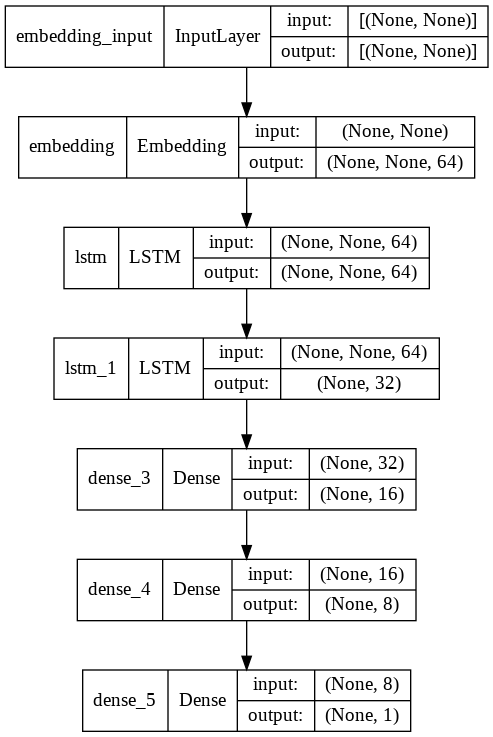

In [54]:
tf.keras.utils.plot_model(model_baseline_LSTM, show_shapes=True)

In [55]:
# Compile the model
model_baseline_LSTM.compile(optimizer=Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(),
              metrics=[binary_accuracy])

In [56]:
model_baseline_LSTM.fit(train_data,
          epochs=20, 
          validation_data=val_data,
          callbacks=[early_stop]
          )

Epoch 1/20
21/21 [==============================] - 4s 41ms/step - loss: 0.6900 - binary_accuracy: 0.5755 - val_loss: 0.6866 - val_binary_accuracy: 0.5819
Epoch 2/20
21/21 [==============================] - 0s 8ms/step - loss: 0.6845 - binary_accuracy: 0.5755 - val_loss: 0.6801 - val_binary_accuracy: 0.5819
Epoch 3/20
21/21 [==============================] - 0s 7ms/step - loss: 0.6786 - binary_accuracy: 0.5755 - val_loss: 0.6737 - val_binary_accuracy: 0.5819
Epoch 4/20
21/21 [==============================] - 0s 8ms/step - loss: 0.6732 - binary_accuracy: 0.5755 - val_loss: 0.6690 - val_binary_accuracy: 0.5819
Epoch 5/20
21/21 [==============================] - 0s 7ms/step - loss: 0.6643 - binary_accuracy: 0.5755 - val_loss: 0.6598 - val_binary_accuracy: 0.5819
Epoch 6/20
21/21 [==============================] - 0s 11ms/step - loss: 0.6374 - binary_accuracy: 0.5755 - val_loss: 0.6364 - val_binary_accuracy: 0.5819
Epoch 7/20
21/21 [==============================] - 0s 8ms/step - loss: 0.

In [57]:
history_baseline_LSTM = pd.DataFrame(model_baseline_LSTM.history.history)
loss_baseline_LSTM = history_baseline_LSTM[["loss","val_loss"]]
accuracy_baseline_LSTM = history_baseline_LSTM[["binary_accuracy","val_binary_accuracy"]]

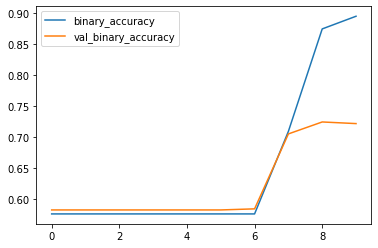

In [58]:
accuracy_baseline_LSTM.plot()

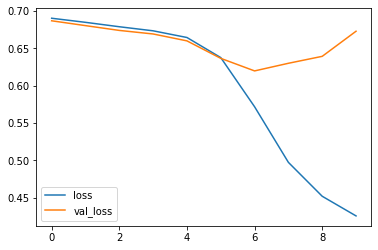

In [59]:
loss_baseline_LSTM.plot()

In [60]:
eval_baseline_LSTM = model_baseline_LSTM.evaluate(test_data)

5/5 [==============================] - 0s 4ms/step - loss: 0.6271 - binary_accuracy: 0.7673


In [61]:
eval_baseline_LSTM

[0.6270758509635925, 0.7672790884971619]

### 3. BASELINE GRU

In [62]:
model_baseline_GRU = tf.keras.Sequential([       
                  Embedding(vocab_size, 64, name="embedding"),
                  GRU(units=64, return_sequences=True),
                  GRU(units=32, return_sequences=False),
                  Dense(16, activation="relu"),
                  Dense(8, activation="relu"),
                  Dense(1, activation="sigmoid")
                  ])

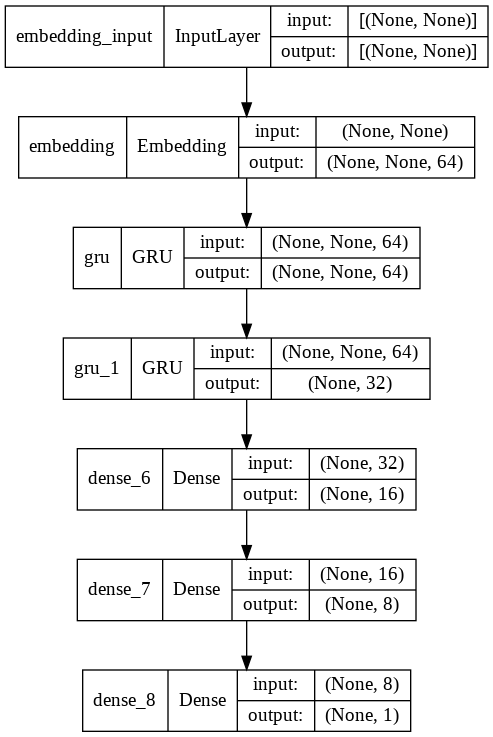

In [63]:
tf.keras.utils.plot_model(model_baseline_GRU, show_shapes=True)

In [64]:
# Compile the model
model_baseline_GRU.compile(optimizer=Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(),
              metrics=[binary_accuracy])

In [65]:
model_baseline_GRU.fit(train_data,
          epochs=20, 
          validation_data=val_data,
          callbacks=[early_stop]
          )

Epoch 1/20
21/21 [==============================] - 4s 40ms/step - loss: 0.6931 - binary_accuracy: 0.5530 - val_loss: 0.6930 - val_binary_accuracy: 0.5819
Epoch 2/20
21/21 [==============================] - 0s 9ms/step - loss: 0.6929 - binary_accuracy: 0.5755 - val_loss: 0.6928 - val_binary_accuracy: 0.5819
Epoch 3/20
21/21 [==============================] - 0s 8ms/step - loss: 0.6928 - binary_accuracy: 0.5755 - val_loss: 0.6927 - val_binary_accuracy: 0.5819
Epoch 4/20
21/21 [==============================] - 0s 9ms/step - loss: 0.6926 - binary_accuracy: 0.5755 - val_loss: 0.6925 - val_binary_accuracy: 0.5819
Epoch 5/20
21/21 [==============================] - 0s 10ms/step - loss: 0.6924 - binary_accuracy: 0.5755 - val_loss: 0.6913 - val_binary_accuracy: 0.5819
Epoch 6/20
21/21 [==============================] - 0s 8ms/step - loss: 0.6891 - binary_accuracy: 0.5755 - val_loss: 0.6854 - val_binary_accuracy: 0.5819
Epoch 7/20
21/21 [==============================] - 0s 9ms/step - loss: 0.

In [66]:
history_baseline_GRU = pd.DataFrame(model_baseline_GRU.history.history)
loss_baseline_GRU = history_baseline_GRU[["loss","val_loss"]]
accuracy_baseline_GRU = history_baseline_GRU[["binary_accuracy","val_binary_accuracy"]]

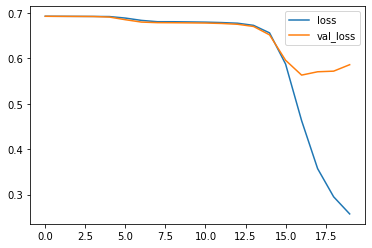

In [67]:
loss_baseline_GRU.plot()

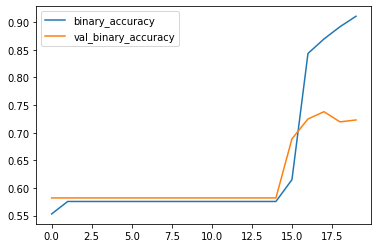

In [68]:
accuracy_baseline_GRU.plot()

In [69]:
eval_baseline_GRU = model_baseline_GRU.evaluate(test_data)

5/5 [==============================] - 0s 4ms/step - loss: 0.5073 - binary_accuracy: 0.7690


### 4. SUMMARY OF BASELINE MODELS

Text(0.5, 0.98, 'Baseline models performances')

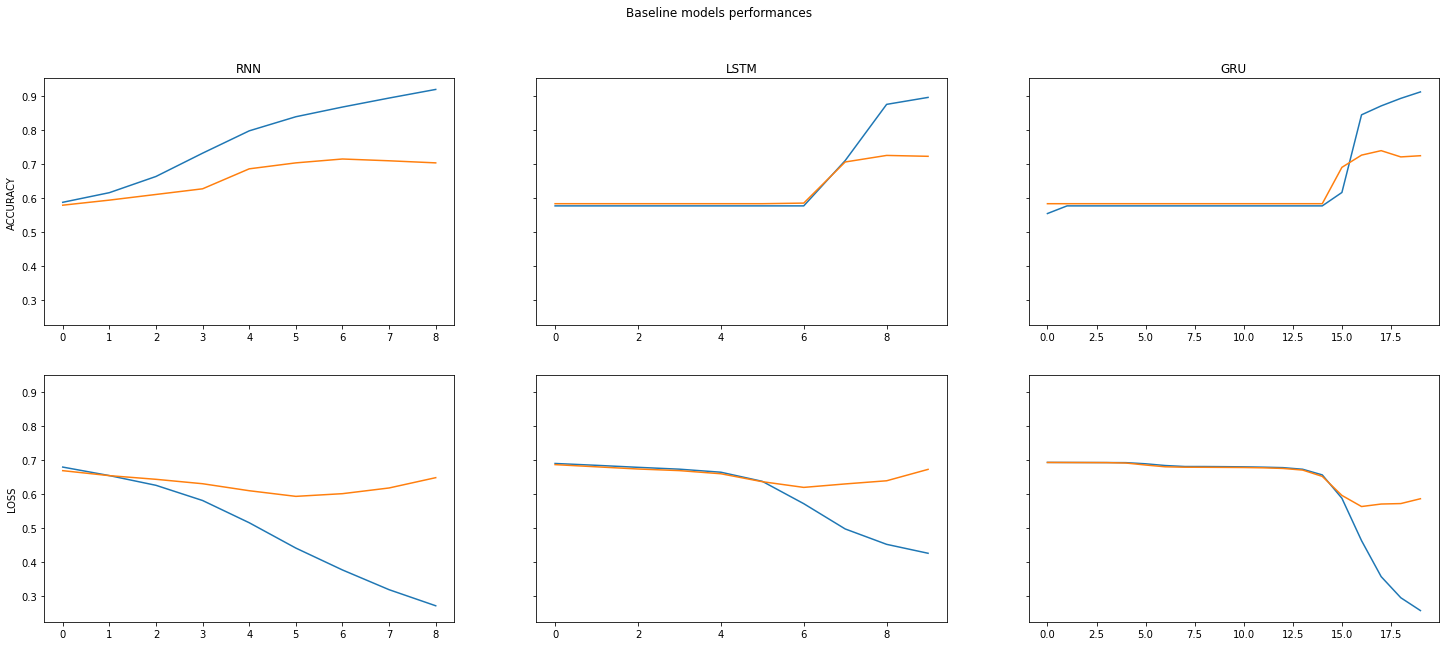

In [70]:
fig, axs = plt.subplots(2, 3, figsize=(25,10), sharey=True)
axs[0, 0].plot(accuracy_baseline_RNN)
axs[0, 0].set_title("RNN")
axs[0,0].set(ylabel='ACCURACY')
axs[0, 1].plot(accuracy_baseline_LSTM)
axs[0, 1].set_title("LSTM")
axs[0, 2].plot(accuracy_baseline_GRU)
axs[0, 2].set_title("GRU")
axs[1, 0].plot(loss_baseline_RNN)
axs[1, 1].plot(loss_baseline_LSTM)
axs[1, 2].plot(loss_baseline_GRU)
axs[1, 0].set(ylabel='LOSS')
fig.suptitle('Baseline models performances')
#fig.tight_layout()

#### Baseline models evaluation

In [71]:
summary_baseline = [["Simple RNN - Baseline", eval_baseline_RNN[0],eval_baseline_RNN[1]],
           ["LSTM - Baseline", eval_baseline_LSTM[0],eval_baseline_LSTM[1]],
           ["GRU - Baseline", eval_baseline_GRU[0],eval_baseline_GRU[1]]]

summary_baseline = pd.DataFrame(summary_baseline, index=[0, 1, 2], columns=["Model", "Test loss", "Test accuracy"])
summary_baseline

,Model,Test loss,Test accuracy
0,Simple RNN - Baseline,0.643771,0.681540
1,LSTM - Baseline,0.627076,0.767279
2,GRU - Baseline,0.507297,0.769029


Unfortunatly these models are not satisfying (overfitting). Let's try to improve it by introducing other features.

## PART V : FEATURE ENGINEERING

Now, let's explore the data deeply and extract further information from the tweets

In [72]:
dataset.head()

,text,target,text_clean,text_encoded,text_pad
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive,"[3479, 407, 169, 1238, 1913]","[3479, 407, 169, 1238, 1913, 0, 0, 0, 0, 0, 0,..."
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[119, 3, 152, 559, 5098, 5099, 961]","[119, 3, 152, 559, 5098, 5099, 961, 0, 0, 0, 0..."
2,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,"[1357, 466, 1498, 347, 5100, 292, 170, 1498, 3...","[1357, 466, 1498, 347, 5100, 292, 170, 1498, 3..."
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,"[7, 2270, 80, 170, 272, 37]","[7, 2270, 80, 170, 272, 37, 0, 0, 0, 0, 0, 0, ..."
4,Just got sent this photo from Ruby #Alaska as ...,1,send photo ruby alaska smoke wildfire pour school,"[180, 120, 5101, 1688, 171, 80, 2271, 106]","[180, 120, 5101, 1688, 171, 80, 2271, 106, 0, ..."


In [73]:
# Extracting further information from tweets
df = ps.get_basic_features(dataset)

In [74]:
df.head()

,text,target,text_clean,text_encoded,text_pad,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive,"[3479, 407, 169, 1238, 1913]","[3479, 407, 169, 1238, 1913, 0, 0, 0, 0, 0, 0,...",57,13,4.384615,6,1,0,0,1
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[119, 3, 152, 559, 5098, 5099, 961]","[119, 3, 152, 559, 5098, 5099, 961, 0, 0, 0, 0...",32,7,4.571429,0,0,0,1,0
2,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,"[1357, 466, 1498, 347, 5100, 292, 170, 1498, 3...","[1357, 466, 1498, 347, 5100, 292, 170, 1498, 3...",112,22,5.090909,9,0,0,1,0
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,"[7, 2270, 80, 170, 272, 37]","[7, 2270, 80, 170, 272, 37, 0, 0, 0, 0, 0, 0, ...",57,8,7.125000,1,1,0,1,0
4,Just got sent this photo from Ruby #Alaska as ...,1,send photo ruby alaska smoke wildfire pour school,"[180, 120, 5101, 1688, 171, 80, 2271, 106]","[180, 120, 5101, 1688, 171, 80, 2271, 106, 0, ...",72,16,4.500000,6,2,0,0,0


In [75]:
features_col_names = ['char_counts', 'word_counts', 'avg_wordlength', 'stopwords_counts', 'hashtag_counts', 'mentions_counts', 'digits_counts', 'uppercase_counts']

In [76]:
import plotly.figure_factory as ff

for col in features_col_names:
  x0=df[df['target']==0][col]
  x1=df[df['target']==1][col]
  hist_data = [x0,x1]
  group_labels = ['Non disaster tweets', 'Disater tweets']
  fig = ff.create_distplot(hist_data, group_labels,show_rug=False)
  fig.update_layout(title='Histogram and kernel density plot of {}'.format(col))
  fig.show()

Among these distributions, we can notice that average_wordlenght and digit_counts curves for disaster and non disaster tweets are shifted. 

In [77]:
# Look if a text includes numbers or not
numbers_in_text=[]
for i in range(df.shape[0]):
  numbers_in_text.append(re.findall("([0-9_]{1,10})", df['text'][i]))
numbers_in_text[0:5]

[[], [], [], ['13', '000'], []]

In [78]:
df['numbers_in_text']=[0 if len(i)==0 else 1 for i in numbers_in_text ]
df.head()

,text,target,text_clean,text_encoded,text_pad,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,numbers_in_text
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive,"[3479, 407, 169, 1238, 1913]","[3479, 407, 169, 1238, 1913, 0, 0, 0, 0, 0, 0,...",57,13,4.384615,6,1,0,0,1,0
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[119, 3, 152, 559, 5098, 5099, 961]","[119, 3, 152, 559, 5098, 5099, 961, 0, 0, 0, 0...",32,7,4.571429,0,0,0,1,0,0
2,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,"[1357, 466, 1498, 347, 5100, 292, 170, 1498, 3...","[1357, 466, 1498, 347, 5100, 292, 170, 1498, 3...",112,22,5.090909,9,0,0,1,0,0
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,"[7, 2270, 80, 170, 272, 37]","[7, 2270, 80, 170, 272, 37, 0, 0, 0, 0, 0, 0, ...",57,8,7.125000,1,1,0,1,0,1
4,Just got sent this photo from Ruby #Alaska as ...,1,send photo ruby alaska smoke wildfire pour school,"[180, 120, 5101, 1688, 171, 80, 2271, 106]","[180, 120, 5101, 1688, 171, 80, 2271, 106, 0, ...",72,16,4.500000,6,2,0,0,0,0


In [79]:
dict_numbers = {1 : 'Text including numbers', 
                 0 : 'Text with no numbers mentionned'
                }

Text(0.5, 1.0, 'Distribution of disaster and non disaster tweets containg or not numbers')

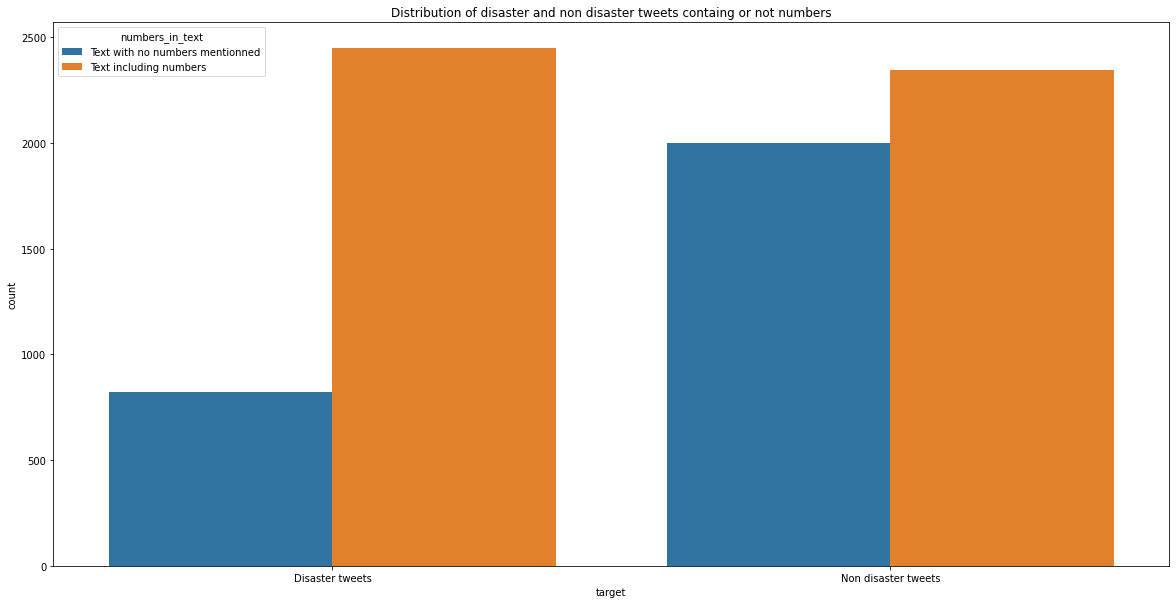

In [80]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(df['target'].map(dict_disaster),hue=df['numbers_in_text'].map(dict_numbers),data=df)
plt.title('Distribution of disaster and non disaster tweets containg or not numbers')

We can notice that there are significantely more real disaster tweets including numbers than those whitout numbers.
It could be interesting to use the column 'numbers_in_text' as a feature for our model.

In [81]:
# Extract the leght of the encoded text
df["len_text_encoded"] = df["text_encoded"].apply(lambda x: len(x))
df.head()

,text,target,text_clean,text_encoded,text_pad,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,numbers_in_text,len_text_encoded
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive,"[3479, 407, 169, 1238, 1913]","[3479, 407, 169, 1238, 1913, 0, 0, 0, 0, 0, 0,...",57,13,4.384615,6,1,0,0,1,0,5
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[119, 3, 152, 559, 5098, 5099, 961]","[119, 3, 152, 559, 5098, 5099, 961, 0, 0, 0, 0...",32,7,4.571429,0,0,0,1,0,0,7
2,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,"[1357, 466, 1498, 347, 5100, 292, 170, 1498, 3...","[1357, 466, 1498, 347, 5100, 292, 170, 1498, 3...",112,22,5.090909,9,0,0,1,0,0,11
3,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,"[7, 2270, 80, 170, 272, 37]","[7, 2270, 80, 170, 272, 37, 0, 0, 0, 0, 0, 0, ...",57,8,7.125000,1,1,0,1,0,1,6
4,Just got sent this photo from Ruby #Alaska as ...,1,send photo ruby alaska smoke wildfire pour school,"[180, 120, 5101, 1688, 171, 80, 2271, 106]","[180, 120, 5101, 1688, 171, 80, 2271, 106, 0, ...",72,16,4.500000,6,2,0,0,0,0,8


In [82]:
x0=df[df['target']==0]['len_text_encoded']
x1=df[df['target']==1]['len_text_encoded']
hist_data = [x0,x1]
group_labels = ['Non disaster tweets', 'Disater tweets']
fig = ff.create_distplot(hist_data, group_labels,show_rug=False)
fig.update_layout(title='Histogram and kernel density plot of len_text')
fig.show()

In [83]:
x0=df[df['target']==0]['word_counts']
x1=df[df['target']==1]['word_counts']
hist_data = [x0,x1]
group_labels = ['Non disaster tweets', 'Disater tweets']
fig = ff.create_distplot(hist_data, group_labels,show_rug=False)
fig.update_layout(title='Histogram and kernel density plot of len_text')
fig.show()

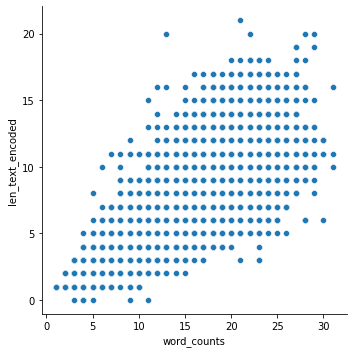

In [84]:
sns.relplot(df['word_counts'],df['len_text_encoded'])

In [85]:
df.columns

Index(['text', 'target', 'text_clean', 'text_encoded', 'text_pad',
       'char_counts', 'word_counts', 'avg_wordlength', 'stopwords_counts',
       'hashtag_counts', 'mentions_counts', 'digits_counts',
       'uppercase_counts', 'numbers_in_text', 'len_text_encoded'],
      dtype='object')

In [86]:
# Define columns to keep further
columns_to_keep = ['text',
                   'text_clean', 
                   'text_encoded',
                   'text_pad', 
                   'avg_wordlength', 
                   'hashtag_counts', 
                   'mentions_counts', 
                   'numbers_in_text', 
                   'len_text_encoded',
                   'target']

In [87]:
# Create a dataframe with only useful columns
data=pd.DataFrame()

for col in columns_to_keep:
  data[col]=df[col]
  
data.head()

,text,text_clean,text_encoded,text_pad,avg_wordlength,hashtag_counts,mentions_counts,numbers_in_text,len_text_encoded,target
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake allah forgive,"[3479, 407, 169, 1238, 1913]","[3479, 407, 169, 1238, 1913, 0, 0, 0, 0, 0, 0,...",4.384615,1,0,0,5,1
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,"[119, 3, 152, 559, 5098, 5099, 961]","[119, 3, 152, 559, 5098, 5099, 961, 0, 0, 0, 0...",4.571429,0,0,0,7,1
2,All residents asked to 'shelter in place' are ...,resident ask shelter place notify officer evac...,"[1357, 466, 1498, 347, 5100, 292, 170, 1498, 3...","[1357, 466, 1498, 347, 5100, 292, 170, 1498, 3...",5.090909,0,0,0,11,1
3,"13,000 people receive #wildfires evacuation or...",people receive wildfire evacuation order calif...,"[7, 2270, 80, 170, 272, 37]","[7, 2270, 80, 170, 272, 37, 0, 0, 0, 0, 0, 0, ...",7.125000,1,0,1,6,1
4,Just got sent this photo from Ruby #Alaska as ...,send photo ruby alaska smoke wildfire pour school,"[180, 120, 5101, 1688, 171, 80, 2271, 106]","[180, 120, 5101, 1688, 171, 80, 2271, 106, 0, ...",4.500000,2,0,0,8,1


## PART VI : TWO-BRANCH MODELS

In order to improve our model, we will feed it with further features. 
In the following we made the choice to keep only 5 features (those for which the distribution between disaster and non disaster tweets is quite different)  

### 1. Prepare the data structure to fit to the two branch models

In [88]:
# Define variables for the model
target_name = 'target'
features_names = ['avg_wordlength', 
                   'hashtag_counts', 
                   'mentions_counts', 
                   'numbers_in_text', 
                   'len_text_encoded']

In [89]:
# Separate features from target 
# Text
X_tab = data.loc[:,[c for c in features_names]]

# Tabular features
X_text = data['text_pad']

# Target
Y = data.loc[:,target_name]

In [90]:
# Preprocess the tabular features

## import standard and LabelEncoder modules from sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

## One hot encode tabular features
scaler = StandardScaler()
X_tab = scaler.fit_transform(X_tab)

## Label encode the target
le = LabelEncoder()
Y = le.fit_transform(Y)

In [91]:
# Create arrays with tensors for preprocessed text, tabular data, and target:

text = [tf.convert_to_tensor(X_text[i], name="tensor_text") for i in range(data.shape[0])]
tabular = [(tf.reshape(tf.convert_to_tensor(X_tab[i,:], name="tensor_tab_features"),[1,-1])) for i in range(data.shape[0])]
target = [(tf.constant(Y[i],name="tensor_target")) for i in range(data.shape[0])]

In [92]:
# Create a TensorSliceDataset for text, tabuar features, and target
text = tf.data.Dataset.from_tensor_slices(text)
tabular = tf.data.Dataset.from_tensor_slices(tabular)
target = tf.data.Dataset.from_tensor_slices(target)

In [93]:
# Zip the three TensorSliceDatasets into a tuple. 
# The first element of this tuple will contain a dictionnary with the text padded and the tabular features while the second one will contain the associated target
df = tf.data.Dataset.zip(({"input_text": text, "input_tabular": tabular}, target))
df

<ZipDataset shapes: ({input_text: (21,), input_tabular: (1, 5)}, ()), types: ({input_text: tf.int32, input_tabular: tf.float64}, tf.int64)>

### 2. Two branch model with simple RNN

In [94]:
# Shuffle the dataset using a seed to make sure that it will shuffle the same way for all of us. 
# In the initial dataset the targets are not well shuffled. As the methods ().take and .skip) we will use bellow take data in the order it is, we will first shuffle our data.
full_dataset = df.shuffle(buffer_size=DATASET_SIZE)

# Define train, val and test datasets using the proportions defined above
train_dataset = full_dataset.take(train_size)
val_dataset = full_dataset.skip(train_size).take(val_size)
test_dataset = full_dataset.skip(train_size + val_size)

# Shuffle and batch the datasets
train = train_dataset.shuffle(buffer_size=train_size,reshuffle_each_iteration=True).batch(BATCH_SIZE)
val = val_dataset.shuffle(buffer_size=val_size,reshuffle_each_iteration=True).batch(BATCH_SIZE)
test = test_dataset.batch(BATCH_SIZE)

In [95]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM, Flatten

# Define shapes for model inputs and target
text_data_shape = text_pad.shape[1]
tab_data_shape = (1,X_tab.shape[1])


# Define a two-branch model architecture
# Define the two inputs layers : text and tabular data
text_input = tf.keras.layers.Input(shape=text_data_shape, name="input_text") # The name here must be identic to the key we defined in the dictionnary containning inputs
tabular_input = tf.keras.layers.Input(shape=tab_data_shape, name="input_tabular") # The name here must be identic to the key we defined in the dictionnary containning inputs

# Define layers for text data 
x1 = tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=64, name='Embedding')(text_input)
x1 = tf.keras.layers.SimpleRNN(units=64, return_sequences=True, name="RNN1")(x1)
x1 = tf.keras.layers.SimpleRNN(units=32, return_sequences=False, name="RNN2")(x1)
x1 = tf.keras.layers.Dense(16, activation="relu")(x1)

# Define layers for tabular data
x2 = tf.keras.layers.Dense(tab_data_shape[1], activation='relu', name="dense1_tabular")(tabular_input)
x2 = tf.keras.layers.Dense(64, activation='relu', name="dense2_tabular")(x2)
x2 = tf.keras.layers.Dense(32, activation='relu', name="dense3_tabular")(x2)
x2 = tf.keras.layers.Flatten(name="flatten_tabular")(x2)

# Merge layers
x = tf.keras.layers.concatenate([x1,x2], name="concat_text_tabular")
x = tf.keras.layers.Dense(16, activation='relu', name="dense1_text_tabular")(x)
x = tf.keras.layers.Dense(8, activation='relu', name="dense2_text_tabular")(x)
output = tf.keras.layers.Dense(1, activation="sigmoid", name="classify")(x)

# Construct the two-branch model (2 inputs and 1 output)
model_RNN = tf.keras.models.Model(inputs=[text_input, tabular_input], outputs=output)

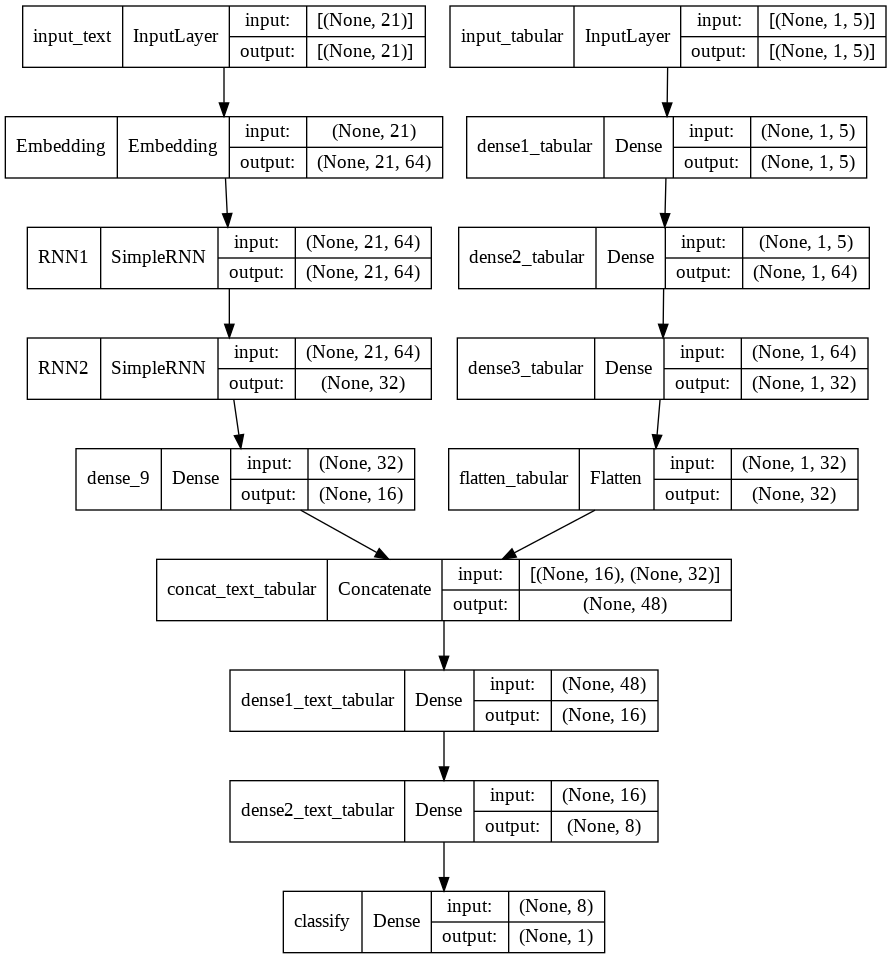

In [96]:
# Plot the two-branch model architecture
tf.keras.utils.plot_model(model_RNN, show_shapes=True)

In [97]:
# Compile the model
model_RNN.compile(optimizer=Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(),
              metrics=[binary_accuracy])

In [98]:
model_RNN.fit(train,
          epochs=20, 
          validation_data=val,
          callbacks=[early_stop]
          )

Epoch 1/20
21/21 [==============================] - 3s 53ms/step - loss: 0.7017 - binary_accuracy: 0.4522 - val_loss: 0.6922 - val_binary_accuracy: 0.5048
Epoch 2/20
21/21 [==============================] - 1s 37ms/step - loss: 0.6874 - binary_accuracy: 0.5695 - val_loss: 0.6831 - val_binary_accuracy: 0.6214
Epoch 3/20
21/21 [==============================] - 1s 36ms/step - loss: 0.6786 - binary_accuracy: 0.6420 - val_loss: 0.6697 - val_binary_accuracy: 0.6599
Epoch 4/20
21/21 [==============================] - 1s 37ms/step - loss: 0.6664 - binary_accuracy: 0.6594 - val_loss: 0.6600 - val_binary_accuracy: 0.6740
Epoch 5/20
21/21 [==============================] - 1s 36ms/step - loss: 0.6488 - binary_accuracy: 0.6842 - val_loss: 0.6339 - val_binary_accuracy: 0.7099
Epoch 6/20
21/21 [==============================] - 1s 36ms/step - loss: 0.6190 - binary_accuracy: 0.7260 - val_loss: 0.5963 - val_binary_accuracy: 0.7458
Epoch 7/20
21/21 [==============================] - 1s 38ms/step - los

In [99]:
history_model_RNN = pd.DataFrame(model_RNN.history.history)
loss_model_RNN = history_model_RNN[["loss","val_loss"]]
accuracy_model_RNN = history_model_RNN[["binary_accuracy","val_binary_accuracy"]]

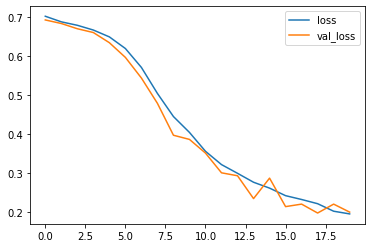

In [100]:
loss_model_RNN.plot()

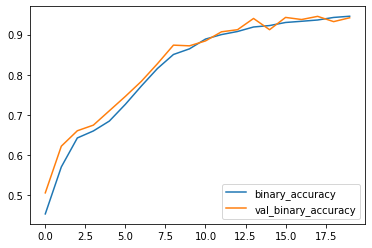

In [101]:
accuracy_model_RNN.plot()

In [102]:
eval_model_RNN = model_RNN.evaluate(test)

5/5 [==============================] - 0s 7ms/step - loss: 0.1939 - binary_accuracy: 0.9414


### 3. Two branch model with LSTM

In [103]:
# Define a two-branch model architecture
# Define the two inputs layers : text and tabular data
text_input = tf.keras.layers.Input(shape=text_data_shape, name="input_text") # The name here must be identic to the key we defined in the dictionnary containning inputs
tabular_input = tf.keras.layers.Input(shape=tab_data_shape, name="input_tabular") # The name here must be identic to the key we defined in the dictionnary containning inputs

# Define layers for text data 
x1 = tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=64, name='Embedding')(text_input)
x1 = tf.keras.layers.LSTM(units=64, return_sequences=True, name="RNN1")(x1)
x1 = tf.keras.layers.LSTM(units=32, return_sequences=False, name="RNN2")(x1)
x1 = tf.keras.layers.Dense(16, activation="relu")(x1)

# Define layers for tabular data
x2 = tf.keras.layers.Dense(tab_data_shape[1], activation='relu', name="dense1_tabular")(tabular_input)
x2 = tf.keras.layers.Dense(64, activation='relu', name="dense2_tabular")(x2)
x2 = tf.keras.layers.Dense(32, activation='relu', name="dense3_tabular")(x2)
x2 = tf.keras.layers.Flatten(name="flatten_tabular")(x2)

# Merge layers
x = tf.keras.layers.concatenate([x1,x2], name="concat_text_tabular")
x = tf.keras.layers.Dense(16, activation='relu', name="dense1_text_tabular")(x)
x = tf.keras.layers.Dense(8, activation='relu', name="dense2_text_tabular")(x)
output = tf.keras.layers.Dense(1, activation="sigmoid", name="classify")(x)

# Construct the two-branch model (2 inputs and 1 output)
model_LSTM = tf.keras.models.Model(inputs=[text_input, tabular_input], outputs=output)

# Compile the model
model_LSTM.compile(optimizer=Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(),
              metrics=[binary_accuracy])

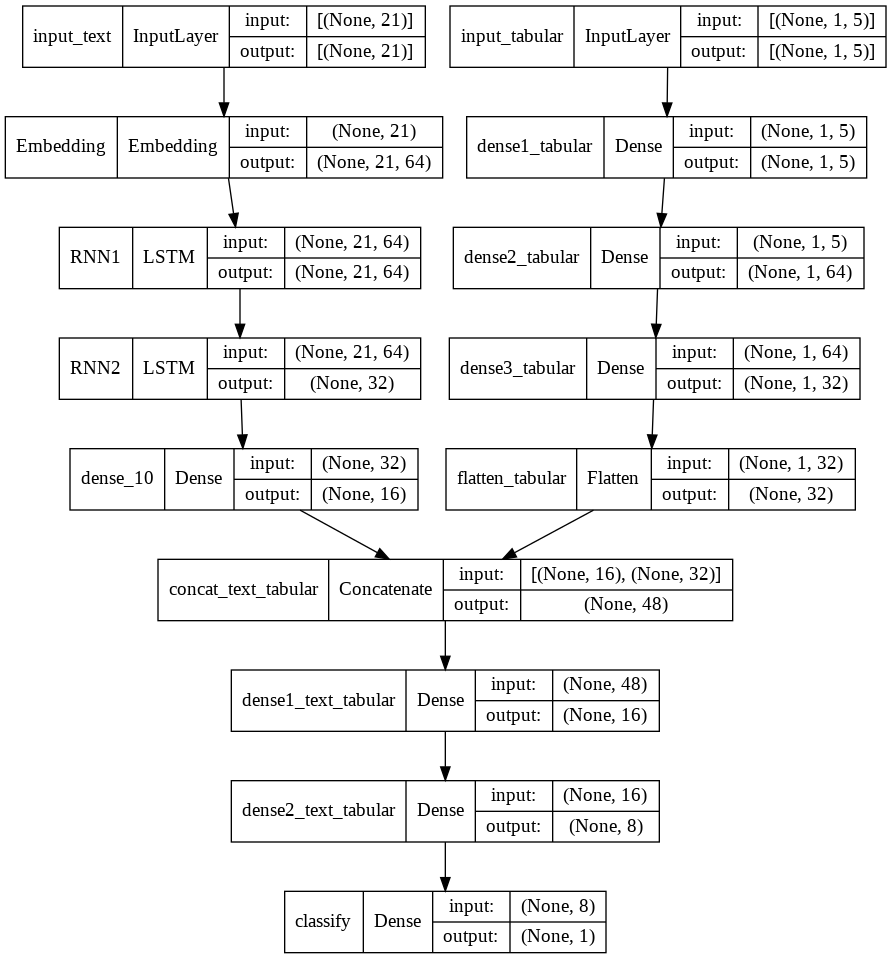

In [104]:
# Plot the two-branch model architecture
tf.keras.utils.plot_model(model_LSTM, show_shapes=True)

In [105]:
model_LSTM.fit(train,
          epochs=20, 
          validation_data=val,
          callbacks=[early_stop]
          )

Epoch 1/20
21/21 [==============================] - 4s 46ms/step - loss: 0.6972 - binary_accuracy: 0.3928 - val_loss: 0.6942 - val_binary_accuracy: 0.4549
Epoch 2/20
21/21 [==============================] - 0s 10ms/step - loss: 0.6930 - binary_accuracy: 0.5249 - val_loss: 0.6926 - val_binary_accuracy: 0.5478
Epoch 3/20
21/21 [==============================] - 0s 10ms/step - loss: 0.6909 - binary_accuracy: 0.5695 - val_loss: 0.6897 - val_binary_accuracy: 0.5679
Epoch 4/20
21/21 [==============================] - 0s 10ms/step - loss: 0.6880 - binary_accuracy: 0.5727 - val_loss: 0.6855 - val_binary_accuracy: 0.5907
Epoch 5/20
21/21 [==============================] - 0s 10ms/step - loss: 0.6852 - binary_accuracy: 0.5663 - val_loss: 0.6830 - val_binary_accuracy: 0.5583
Epoch 6/20
21/21 [==============================] - 0s 10ms/step - loss: 0.6783 - binary_accuracy: 0.5740 - val_loss: 0.6736 - val_binary_accuracy: 0.5758
Epoch 7/20
21/21 [==============================] - 0s 10ms/step - los

In [106]:
history_model_LSTM = pd.DataFrame(model_LSTM.history.history)
loss_model_LSTM = history_model_LSTM[["loss","val_loss"]]
accuracy_model_LSTM = history_model_LSTM[["binary_accuracy","val_binary_accuracy"]]

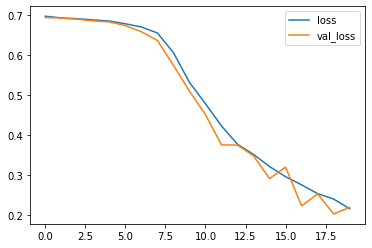

In [107]:
loss_model_LSTM.plot()

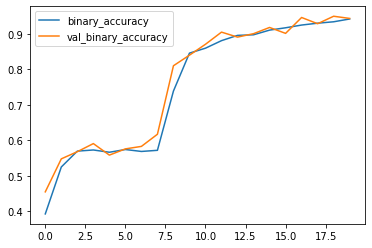

In [108]:
accuracy_model_LSTM.plot()

In [109]:
eval_model_LSTM = model_LSTM.evaluate(test)

5/5 [==============================] - 0s 5ms/step - loss: 0.1868 - binary_accuracy: 0.9536


### 4. Two branch model with GRU

In [110]:
# Define a two-branch model architecture
# Define the two inputs layers : text and tabular data
text_input = tf.keras.layers.Input(shape=text_data_shape, name="input_text") # The name here must be identic to the key we defined in the dictionnary containning inputs
tabular_input = tf.keras.layers.Input(shape=tab_data_shape, name="input_tabular") # The name here must be identic to the key we defined in the dictionnary containning inputs

# Define layers for text data 
x1 = tf.keras.layers.Embedding(input_dim=vocab_size,output_dim=64, name='Embedding')(text_input)
x1 = tf.keras.layers.GRU(units=64, return_sequences=True, name="RNN1")(x1)
x1 = tf.keras.layers.GRU(units=32, return_sequences=False, name="RNN2")(x1)
x1 = tf.keras.layers.Dense(16, activation="relu")(x1)

# Define layers for tabular data
x2 = tf.keras.layers.Dense(tab_data_shape[1], activation='relu', name="dense1_tabular")(tabular_input)
x2 = tf.keras.layers.Dense(64, activation='relu', name="dense2_tabular")(x2)
x2 = tf.keras.layers.Dense(32, activation='relu', name="dense3_tabular")(x2)
x2 = tf.keras.layers.Flatten(name="flatten_tabular")(x2)

# Merge layers
x = tf.keras.layers.concatenate([x1,x2], name="concat_text_tabular")
x = tf.keras.layers.Dense(16, activation='relu', name="dense1_text_tabular")(x)
x = tf.keras.layers.Dense(8, activation='relu', name="dense2_text_tabular")(x)
output = tf.keras.layers.Dense(1, activation="sigmoid", name="classify")(x)

# Construct the two-branch model (2 inputs and 1 output)
model_GRU = tf.keras.models.Model(inputs=[text_input, tabular_input], outputs=output)

# Compile the model
model_GRU.compile(optimizer=Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(),
              metrics=[binary_accuracy])

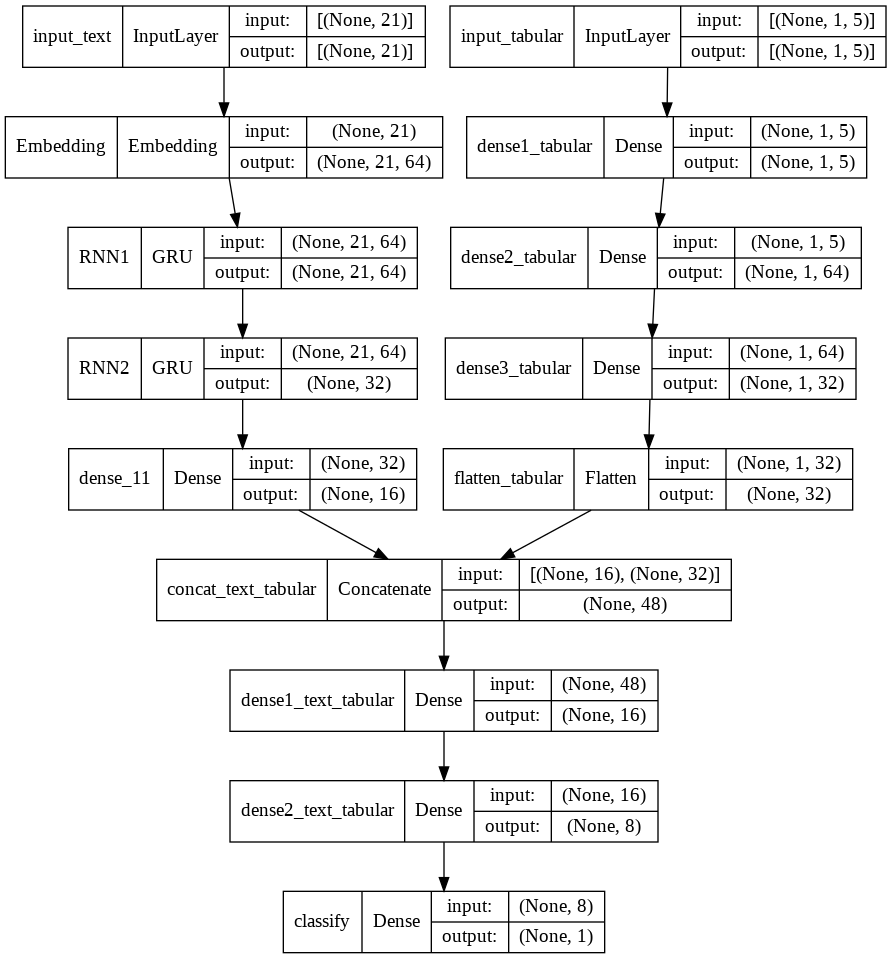

In [111]:
# Plot the two-branch model architecture
tf.keras.utils.plot_model(model_GRU, show_shapes=True)

In [112]:
model_GRU.fit(train,
          epochs=20, 
          validation_data=val,
          callbacks=[early_stop]
          )

Epoch 1/20
21/21 [==============================] - 4s 43ms/step - loss: 0.6894 - binary_accuracy: 0.5371 - val_loss: 0.6872 - val_binary_accuracy: 0.5828
Epoch 2/20
21/21 [==============================] - 0s 10ms/step - loss: 0.6860 - binary_accuracy: 0.5964 - val_loss: 0.6843 - val_binary_accuracy: 0.6030
Epoch 3/20
21/21 [==============================] - 0s 11ms/step - loss: 0.6828 - binary_accuracy: 0.5960 - val_loss: 0.6800 - val_binary_accuracy: 0.6082
Epoch 4/20
21/21 [==============================] - 0s 10ms/step - loss: 0.6784 - binary_accuracy: 0.5995 - val_loss: 0.6781 - val_binary_accuracy: 0.5960
Epoch 5/20
21/21 [==============================] - 0s 9ms/step - loss: 0.6748 - binary_accuracy: 0.5885 - val_loss: 0.6754 - val_binary_accuracy: 0.5706
Epoch 6/20
21/21 [==============================] - 0s 10ms/step - loss: 0.6725 - binary_accuracy: 0.5753 - val_loss: 0.6688 - val_binary_accuracy: 0.5723
Epoch 7/20
21/21 [==============================] - 0s 10ms/step - loss

In [113]:
history_model_GRU = pd.DataFrame(model_GRU.history.history)
loss_model_GRU = history_model_GRU[["loss","val_loss"]]
accuracy_model_GRU = history_model_GRU[["binary_accuracy","val_binary_accuracy"]]

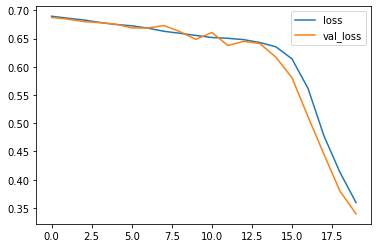

In [114]:
loss_model_GRU.plot()

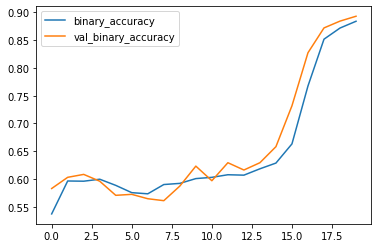

In [115]:
accuracy_model_GRU.plot()

In [116]:
eval_model_GRU = model_GRU.evaluate(test)

5/5 [==============================] - 0s 5ms/step - loss: 0.3276 - binary_accuracy: 0.8924


### 4. SUMMARY OF TWO-BRANCH MODELS

Text(0.5, 0.98, 'Two-branch models performances')

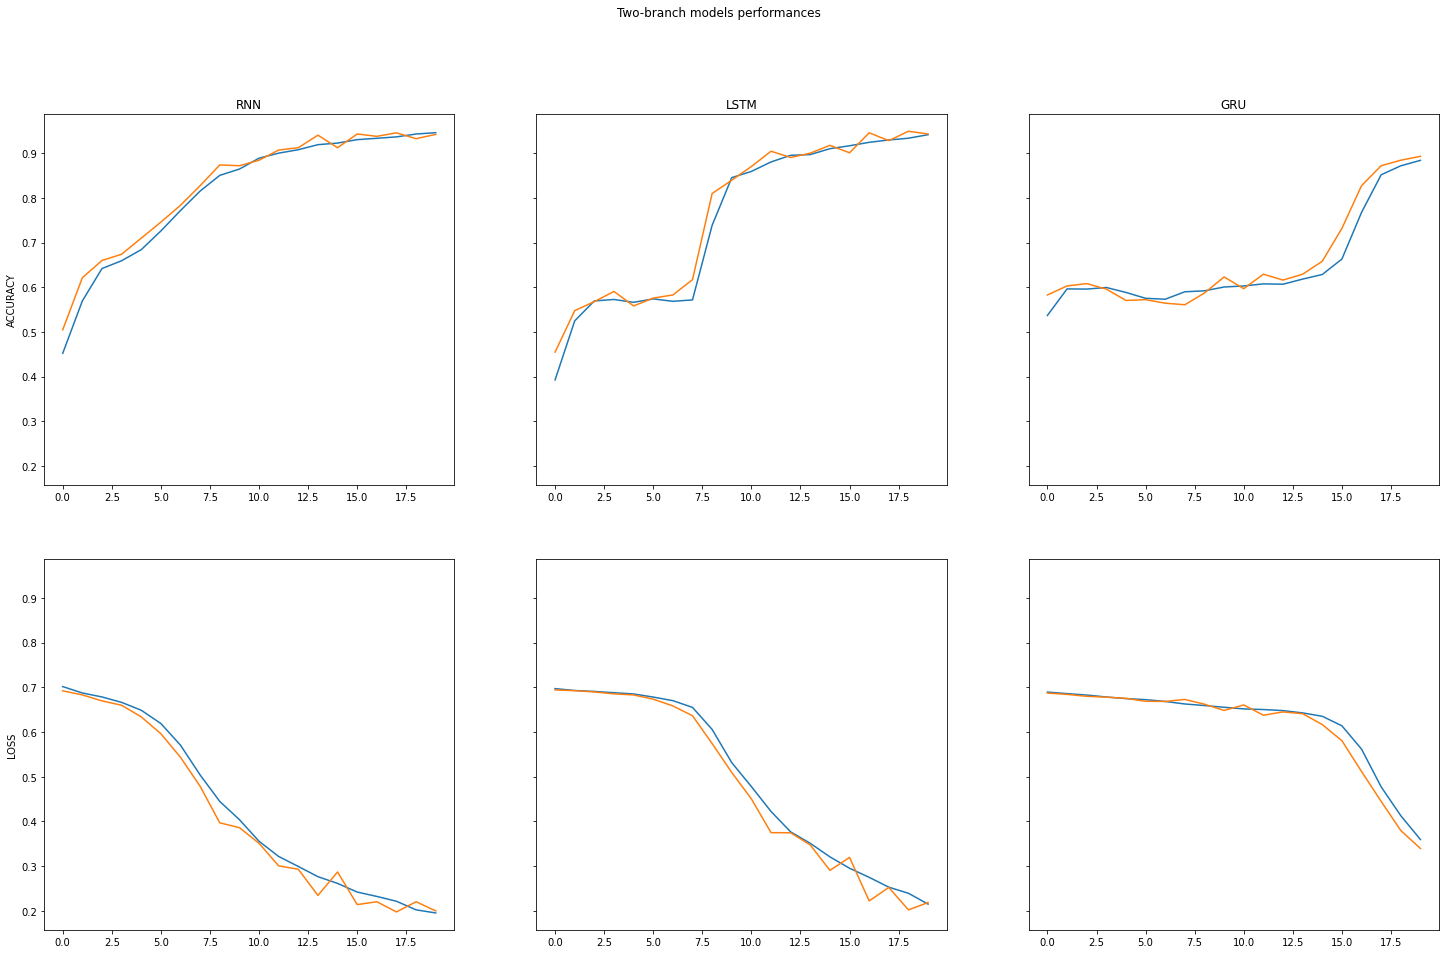

In [117]:
fig, axs = plt.subplots(2, 3, figsize=(25,15), sharey=True, squeeze=False)
axs[0, 0].plot(accuracy_model_RNN)
axs[0, 0].set_title("RNN")
axs[0,0].set(ylabel='ACCURACY')
axs[0, 1].plot(accuracy_model_LSTM)
axs[0, 1].set_title("LSTM")
axs[0, 2].plot(accuracy_model_GRU)
axs[0, 2].set_title("GRU")
axs[1, 0].plot(loss_model_RNN)
axs[1, 1].plot(loss_model_LSTM)
axs[1, 2].plot(loss_model_GRU)
axs[1, 0].set(ylabel='LOSS')
fig.suptitle('Two-branch models performances') 
#axs.ylim(0.5, 1)
#fig.tight_layout()

#### Two-branch models evaluation

In [118]:
summary_model = [["Simple RNN - Two-Branch", eval_model_RNN[0],eval_model_RNN[1]],
           ["LSTM - Two-Branch", eval_model_LSTM[0],eval_model_LSTM[1]],
           ["GRU - Two-Branch", eval_model_GRU[0],eval_model_GRU[1]]]

summary_model = pd.DataFrame(summary_model, index=[0, 1, 2], columns=["Model", "Test loss", "Test accuracy"])
summary_model

,Model,Test loss,Test accuracy
0,Simple RNN - Two-Branch,0.193871,0.941382
1,LSTM - Two-Branch,0.186828,0.953631
2,GRU - Two-Branch,0.327634,0.892388


## CONCLUSION

In [119]:
summary = summary_baseline.append(summary_model, ignore_index=True)

In [120]:
summary

,Model,Test loss,Test accuracy
0,Simple RNN - Baseline,0.643771,0.681540
1,LSTM - Baseline,0.627076,0.767279
2,GRU - Baseline,0.507297,0.769029
3,Simple RNN - Two-Branch,0.193871,0.941382
4,LSTM - Two-Branch,0.186828,0.953631
5,GRU - Two-Branch,0.327634,0.892388


Feature engineering performance gain

In [121]:
summary_model['Test accuracy'][0]

0.9413823485374451

In [122]:
gain_loss_RNN = str(round(-(summary_model['Test loss'][0]-summary_baseline['Test loss'][0])/summary_baseline['Test loss'][0]*100,1)) +' %'
gain_acc_RNN = str(round((summary_model['Test accuracy'][0]-summary_baseline['Test accuracy'][0])/summary_baseline['Test accuracy'][0]*100,1)) +' %'
gain_loss_LSTM = str(round(-(summary_model['Test loss'][1]-summary_baseline['Test loss'][1])/summary_baseline['Test loss'][1]*100,1)) +' %'
gain_acc_LSTM = str(round((summary_model['Test accuracy'][1]-summary_baseline['Test accuracy'][1])/summary_baseline['Test accuracy'][1]*100,1)) +' %'
gain_loss_GRU = str(round(-(summary_model['Test loss'][2]-summary_baseline['Test loss'][2])/summary_baseline['Test loss'][2]*100,1)) +' %'
gain_acc_GRU = str(round((summary_model['Test accuracy'][2]-summary_baseline['Test accuracy'][2])/summary_baseline['Test accuracy'][2]*100,1)) +' %'


feat_eng_gain = [["RNN", gain_loss_RNN, gain_acc_RNN],
           ["LSTM",gain_loss_LSTM, gain_acc_LSTM],
           ["GRU",gain_loss_GRU,gain_acc_GRU]]

feat_eng_gain = pd.DataFrame(feat_eng_gain, index=[0, 1, 2], columns=["Model", "Loss gain", "Accuracy gain"])
feat_eng_gain

,Model,Loss gain,Accuracy gain
0,RNN,69.9 %,38.1 %
1,LSTM,70.2 %,24.3 %
2,GRU,35.4 %,16.0 %


As we can see, by introducing other features, we improved significantly the performances. This exercise illustrates the feature engineering importance in datascience.